<a href="https://colab.research.google.com/github/Cath2312/python1/blob/main/Analizando%20un%20conjunto%20de%20datos%20con%20Pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **NACIMIENTOS -Conjunto de datos con Pandas-**

A continuación se estan descargando los datos desde la pagina web http://www.dgis.salud.gob.mx/contenidos/basesdedatos/Datos_Abiertos_gobmx.html de la  Secretaría de Salud/DGIS.
Se descomprime el archivo y se muestran los primeros cinco renglones.

In [79]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import numpy as np
import zipfile
import requests
from io import BytesIO
from zipfile import ZipFile
import pandas
import pandas as pd
import matplotlib.pyplot as plt

url = "http://www.dgis.salud.gob.mx/descargas/datosabiertos/nacimientos/sinac_2023.zip?V=2024.05.14"
filename = requests.get(url).content
zf = ZipFile( BytesIO(filename), 'r' )
for item in zf.namelist():
    print("File in zip: "+ item)

match = [s for s in zf.namelist() if "Nacimientos_2023.csv" in s][0]
df = pandas.read_csv( zf.open(match))
df.head(5)


File in zip: Nacimientos_2023.csv


,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,...,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA,FECHACERTIFICADO
0,2,9,12,25,2,...,NaN,9,10,1,09/05/2023
1,2,15,33,22,2,...,NaN,9,5,1,28/02/2023
2,2,12,28,20,1,...,NaN,12,28,1,17/06/2023
3,2,13,63,28,2,...,NaN,13,63,1,21/11/2023
4,2,15,101,29,2,...,NaN,15,54,35,08/05/2023


Los tipos de datos de las columnas del DataFrame son:

In [80]:
print(df.dtypes)

NACIOEXTRANJERO                int64
ENTIDADNACIMIENTO              int64
MUNICIPIONACIMIENTO            int64
EDAD                           int64
SECONSIDERAINDIGENA            int64
                               ...  
CLUESCERTIFICA                object
ENTIDADFEDERATIVACERTIFICA     int64
MUNICIPIOCERTIFICA             int64
LOCALIDADCERTIFICA             int64
FECHACERTIFICADO              object
Length: 64, dtype: object


Después, se genera un indice con las fechas, usando una transformación a tipo timestamp.

In [81]:
df['FECHANACIMIENTO'] = pd.to_datetime(df['FECHANACIMIENTO'], errors='coerce', dayfirst=True)
df.set_index('FECHANACIMIENTO', inplace=True)
df['FECHACERTIFICADO'] = pd.to_datetime(df['FECHACERTIFICADO'], errors='coerce', dayfirst=True)
df.set_index('FECHACERTIFICADO', inplace=True)


Y la tabla queda de la siguiente manera:

In [82]:
df

,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,PERSONALATENDIO,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA
FECHACERTIFICADO,,,,,,,,,,,,,,,,,,,,,
2023-05-09,2,9,12,25,2,2,23/07/1997,5,2,9,...,1,11.0,9,10,1,1,NaN,9,10,1
2023-02-28,2,15,33,22,2,2,11/05/2000,5,2,9,...,1,11.0,9,5,1,1,NaN,9,5,1
2023-06-17,2,12,28,20,1,1,12/08/2002,4,2,12,...,1,14.0,12,28,1,2,NaN,12,28,1
2023-11-21,2,13,63,28,2,2,24/12/1994,4,2,13,...,1,11.0,13,63,1,1,NaN,13,63,1
2023-05-08,2,15,101,29,2,2,23/05/1993,4,2,15,...,1,11.0,15,54,35,1,NaN,15,54,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-20,2,9,15,23,2,2,18/12/1999,4,2,9,...,1,11.0,9,15,1,2,DFSSA003973,9,15,1
2023-08-15,2,15,40,16,2,2,11/02/2007,4,2,15,...,1,11.0,15,40,13,2,MCSSA010251,15,40,13
2023-11-27,2,8,19,21,2,2,06/07/2002,1,2,8,...,1,11.0,8,19,1,2,CHSMP000066,8,19,1


Ahora, filtramos los datos para el año 2023, para el estado de Sonora.
De esta manera generamos una nueva tabla, en la cual estaremos trabajando

In [83]:
anio = 2023
estado = 26
df_filtrado = df.loc[(df.index.year == anio) & (df['ENTIDADNACIMIENTO'] == estado)]
df_filtrado


,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,...,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA
FECHACERTIFICADO,,,,,,,,,,,
2023-06-17,2,26,29,19,2,...,1,NaN,26,29,1
2023-04-10,2,26,18,17,1,...,7,NaN,26,18,1
2023-03-09,2,26,36,32,2,...,2,NaN,26,36,1
2023-08-30,2,26,30,28,2,...,1,NaN,26,30,1
2023-08-30,2,26,30,26,2,...,1,NaN,26,30,1
...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,2,26,19,33,2,...,2,SRSMP000372,26,30,1
2023-11-24,2,26,18,20,2,...,1,SRIMS000145,26,18,1
2023-11-15,2,26,18,35,2,...,2,SRSME000023,26,18,1


A continuación modificamos los valores de variables cualitativas para que sean más representativas para un análisis

In [84]:
columnas = ['ENTIDADNACIMIENTO', 'ENTIDADRESIDENCIA', 'MUNICIPIORESIDENCIA', 'ENTIDADFEDERATIVAPARTO', 'MUNICIPIOPARTO', 'ENTIDADFEDERATIVACERTIFICA', 'MUNICIPIOCERTIFICA']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(26, 'Sonora')

In [85]:
reemplazos = {
    0 : 'NO ESPECIFICADO',
    1 : 'SI',
    2 : 'NO',
    8 : 'NO APLICA',
    9: 'SE IGNORA'
}
columnas = ['VITAMINA_K','VITAMINA_A','VACUNAHEPATITIS_B','TAMIZAUDITIVO','VACUNA_BCG','NACIOEXTRANJERO', 'SECONSIDERAINDIGENA', 'HABLALENGUAINDIGENA', 'RESIDEEXTRANJERO', 'TRABAJAACTUALMENTE', 'INTERRUMPIOESTUDIOS', 'SOBREVIVIOPARTO','ATENCIONPRENATAL','VIVEHIJOANTERIOR',]

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [86]:
reemplazos = {
    1: 'ACONCHI',
    2: 'AGUA PRIETA',
    3: 'ALAMOS',
    4: 'ALTAR',
    5: 'ARIVECHI',
    6: 'ARIZPE',
    7: 'ATIL',
    8: 'BACADEHUACHI',
    9: 'BACANORA',
    10: 'BACERAC',
    11: 'BACOACHI',
    12: 'BACUM',
    13: 'BANAMICHI',
    14: 'BAVIACORA',
    15: 'BAVISPE',
    16: 'BENJAMIN HILL',
    17: 'CABORCA',
    18: 'CAJEME',
    19: 'CANANEA',
    20: 'CARBO',
    21: 'LA COLORADA',
    22: 'CUCURPE',
    23: 'CUMPAS',
    24: 'DIVISADEROS',
    25: 'EMPALME',
    26: 'ETCHOJOA',
    27: 'FRONTERAS',
    28: 'GRANADOS',
    29: 'GUAYMAS',
    30: 'HERMOSILLO',
    31: 'HUACHINERA',
    32: 'HUASABAS',
    33: 'HUATABAMPO',
    34: 'HUEPAC',
    35: 'IMURIS',
    36: 'MAGDALENA',
    37: 'MAZATAN',
    38: 'MOCTEZUMA',
    39: 'NACO',
    40: 'NACORI CHICO',
    41: 'NACOZARI DE GARCIA',
    42: 'NAVOJOA',
    43: 'NOGALES',
    44: 'ONAVAS',
    45: 'OPODEPE',
    46: 'OQUITOA',
    47: 'PITIQUITO',
    48: 'PUERTO PEÑASCO',
    49: 'QUIRIEGO',
    50: 'RAYON',
    51: 'ROSARIO',
    52: 'SAHUARIPA',
    53: 'SAN FELIPE DE JESUS',
    54: 'SAN JAVIER',
    55: 'SAN LUIS RIO COLORADO',
    56: 'SAN MIGUEL DE HORCASITAS',
    57: 'SAN PEDRO DE LA CUEVA',
    58: 'SANTA ANA',
    59: 'SANTA CRUZ',
    60: 'SARIC',
    61: 'SOYOPA',
    62: 'SUAQUI GRANDE',
    63: 'TEPACHE',
    64: 'TRINCHERAS',
    65: 'TUBUTAMA',
    66: 'URES',
    67: 'VILLA HIDALGO',
    68: 'VILLA PESQUEIRA',
    69: 'YECORA',
    70: 'GENERAL PLUTARCO ELIAS CALLES',
    71: 'BENITO JUAREZ',
    72: 'SAN IGNACIO RIO MUERTO',
    999: 'NO ESPECIFICADO'
}

columnas = ['MUNICIPIONACIMIENTO', 'MUNICIPIORESIDENCIA', 'MUNICIPIOPARTO', 'MUNICIPIOCERTIFICA']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [89]:
reemplazos = {
    0: 'NO ESPECIFICADO',
    1: 'SOLTERO(A)',
    2: 'VIUDO(A)',
    3: 'DIVORCIADO(A)',
    4: 'UNION LIBRE',
    5: 'CASADO(A)',
    6: 'SEPARADO(A)',
    8: 'NO APLICA',
    9: 'SE IGNORA'
}

columnas = ['ESTADOCONYUGAL']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [90]:
reemplazos = {
0	: 'NO ESPECIFICADO',
1	: 'VIVO',
2 :	'MUERTO',
3 :	'NO HA TENIDO OTROS HIJOS(AS)',
9 :	'SE IGNORA'
   }

columnas = ['CONDICIONHIJOANTERIOR']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [91]:
reemplazos = {
0:	'NO RECIBIÓ',
1:	'PRIMER TRIMESTRE',
2:	'SEGUNDO TRIMESTRE',
3:	'TERCER TRIMESTRE',
8:	'NO ESPECIFICADO',
9:	'SE IGNORA'
   }

columnas = ['TRIMESTREPRIMERCONSULTA']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [92]:
reemplazos = {
00	:'NO ESPECIFICADO',
1	:'NINGUNA',
2	:'IMSS',
3	:'ISSSTE',
4	:'PEMEX',
5	:'SEDENA',
6	:'SEMAR',
7	:'SEGURO POPULAR / INSABI',
8	:'OTRA',
10	:'IMSS BIENESTAR',
11	:'ISSFAM',
88	:'NO APLICA',
99	:'SE IGNORA'
   }

columnas = ['AFILIACION']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [93]:
reemplazos = {
    0: 'NO ESPECIFICADO',
    1: 'NINGUNA',
    31: 'PRIMARIA COMPLETA',
    32: 'PRIMARIA INCOMPLETA',
    51: 'SECUNDARIA COMPLETA',
    52: 'SECUNDARIA INCOMPLETA',
    71: 'BACHILLERATO O PREPARATORIA COMPLETA',
    72: 'BACHILLERATO O PREPARATORIA INCOMPLETA',
    81: 'LICENCIATURA O PROFESIONAL COMPLETO',
    82: 'LICENCIATURA O PROFESIONAL INCOMPLETO',
    88: 'NO APLICA',
    99: 'SE IGNORA',
    101: 'POSGRADO COMPLETO',
    102: 'POSGRADO INCOMPLETO',
    111: 'TÉCNICO TERMINAL CON SECUNDARIA COMPLETA',
    112: 'TÉCNICO TERMINAL CON SECUNDARIA INCOMPLETA',
    131: 'TÉCNICO TERMINAL CON PREPARATORIA COMPLETA',
    132: 'TÉCNICO TERMINAL CON PREPARATORIA INCOMPLETA'
}

columnas = ['ESCOLARIDAD']
for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [94]:
reemplazos = {
    0: 'NO ESPECIFICADO',
    1: 'HOMBRE',
    2: 'MUJER',
    9: 'SE IGNORA'
}

columnas = ['SEXO']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [95]:
reemplazos = {
    0: 'NO ESPECIFICADO',
    1: 'ÚNICO',
    2: 'GEMELAR',
    3: 'TRES O MÁS'
}

columnas = ['PRODUCTOEMBARAZO']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

In [96]:
reemplazos = {
    0: 'NO ESPECIFICADO',
    1: 'SECRETARÍA DE SALUD',
    2: 'IMSS PROSPERA',
    3: 'IMSS',
    4: 'ISSSTE',
    5: 'PEMEX',
    6: 'SEDENA',
    7: 'SEMAR',
    8: 'OTRA UNIDAD PÚBLICA',
    9: 'UNIDAD MÉDICA PRIVADA',
    10: 'VÍA PÚBLICA',
    11: 'HOGAR',
    12: 'OTRO LUGAR',
    13: 'INSABI',
    99: 'SE IGNORA'
}

columnas = ['LUGARNACIMIENTO']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)


In [97]:
reemplazos = {
    0: 'NO ESPECIFICADO',
    1: 'EUTÓCICO',
    2: 'DISTÓCICO',
    3: 'CESÁREA',
    8: 'OTRO'
}

columnas = ['RESOLUCIONEMBARAZO']

for columna in columnas:
    df_filtrado[columna] = df_filtrado[columna].replace(reemplazos)

La tabla ya modificada se ve así:

In [98]:
df_filtrado

,NACIOEXTRANJERO,ENTIDADNACIMIENTO,MUNICIPIONACIMIENTO,EDAD,SECONSIDERAINDIGENA,HABLALENGUAINDIGENA,FECHANACIMIENTOMADRE,ESTADOCONYUGAL,RESIDEEXTRANJERO,ENTIDADRESIDENCIA,...,PERSONALATENDIO,TIPOMEDICOATENDIO,ENTIDADFEDERATIVAPARTO,MUNICIPIOPARTO,LOCALIDADPARTO,CERTIFICADOPOR,CLUESCERTIFICA,ENTIDADFEDERATIVACERTIFICA,MUNICIPIOCERTIFICA,LOCALIDADCERTIFICA
FECHACERTIFICADO,,,,,,,,,,,,,,,,,,,,,
2023-06-17,NO,Sonora,GUAYMAS,19,NO,NO,08/09/2003,UNION LIBRE,NO,Sonora,...,1,11.0,Sonora,GUAYMAS,1,1,NaN,Sonora,GUAYMAS,1
2023-04-10,NO,Sonora,CAJEME,17,SI,NO,01/09/2005,UNION LIBRE,NO,Sonora,...,1,11.0,Sonora,CAJEME,1,7,NaN,Sonora,CAJEME,1
2023-03-09,NO,Sonora,MAGDALENA,32,NO,NO,29/12/1990,UNION LIBRE,NO,Sonora,...,1,11.0,Sonora,MAGDALENA,1,2,NaN,Sonora,MAGDALENA,1
2023-08-30,NO,Sonora,HERMOSILLO,28,NO,NO,07/04/1995,UNION LIBRE,NO,Sonora,...,1,11.0,Sonora,HERMOSILLO,1,1,NaN,Sonora,HERMOSILLO,1
2023-08-30,NO,Sonora,HERMOSILLO,26,NO,NO,06/02/1997,CASADO(A),NO,Sonora,...,1,11.0,Sonora,HERMOSILLO,1,1,NaN,Sonora,HERMOSILLO,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-08,NO,Sonora,CANANEA,33,NO,NO,18/08/1990,CASADO(A),NO,Sonora,...,1,11.0,Sonora,HERMOSILLO,1,2,SRSMP000372,Sonora,HERMOSILLO,1
2023-11-24,NO,Sonora,CAJEME,20,NO,NO,04/12/2002,CASADO(A),NO,Sonora,...,1,11.0,Sonora,CAJEME,1,1,SRIMS000145,Sonora,CAJEME,1
2023-11-15,NO,Sonora,CAJEME,35,NO,NO,03/09/1988,CASADO(A),NO,Sonora,...,1,11.0,Sonora,CAJEME,1,2,SRSME000023,Sonora,CAJEME,1


Por último,  se realiza un análisis exploratorio básico, donde se hacen algunas gráficas que muestran algunos detalles importantes o interesantes y con algunas regrupaciones simples.

In [128]:
df_filtrado.describe()

,EDAD,LOCALIDADRESIDENCIA,NUMEROEMBARAZOS,HIJOSNACIDOSMUERTOS,HIJOSNACIDOSVIVOS,...,PERSONALATENDIO,TIPOMEDICOATENDIO,LOCALIDADPARTO,CERTIFICADOPOR,LOCALIDADCERTIFICA
count,30905.000000,30905.000000,30905.000000,30905.000000,30905.000000,...,30905.000000,30796.000000,30905.000000,30905.000000,30905.000000
mean,26.215531,236.138230,2.195599,0.249992,1.985601,...,1.016049,11.364463,9.178191,2.990228,8.900404
std,6.233280,1094.655232,1.360839,1.251178,1.430735,...,0.329931,0.985942,90.822432,2.607990,60.260641
min,11.000000,1.000000,1.000000,0.000000,1.000000,...,0.000000,11.000000,1.000000,0.000000,1.000000
25%,21.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,11.000000,1.000000,1.000000,1.000000
50%,26.000000,1.000000,2.000000,0.000000,2.000000,...,1.000000,11.000000,1.000000,2.000000,1.000000
75%,31.000000,251.000000,3.000000,0.000000,3.000000,...,1.000000,11.000000,1.000000,7.000000,1.000000
max,53.000000,9999.000000,99.000000,99.000000,99.000000,...,8.000000,16.000000,9999.000000,7.000000,3812.000000


Distribución de edades de las madres

Text(0, 0.5, 'Número de nacimientos')

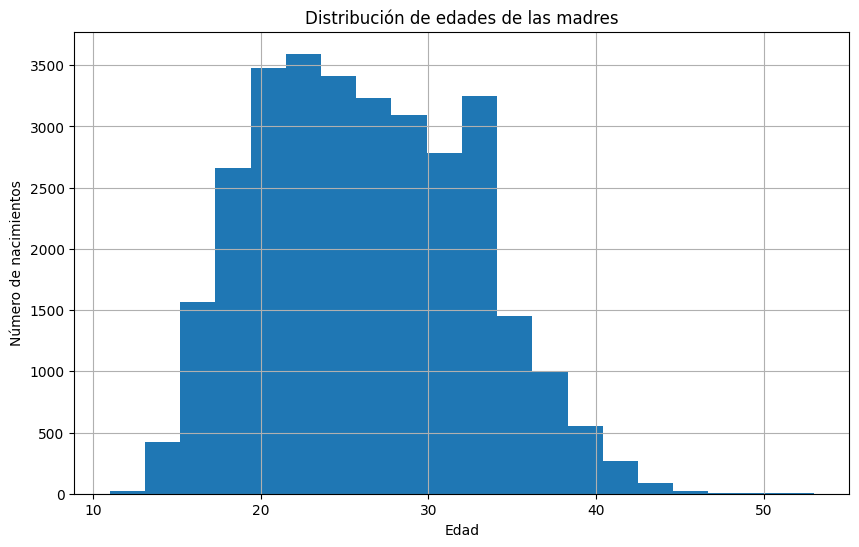

In [125]:
plt.figure(figsize=(10, 6))
df_filtrado['EDAD'].hist(bins=20)
plt.title('Distribución de edades de las madres')
plt.xlabel('Edad')
plt.ylabel('Número de nacimientos')

Gráfico de barras del número de nacimientos para cada nivel de educación

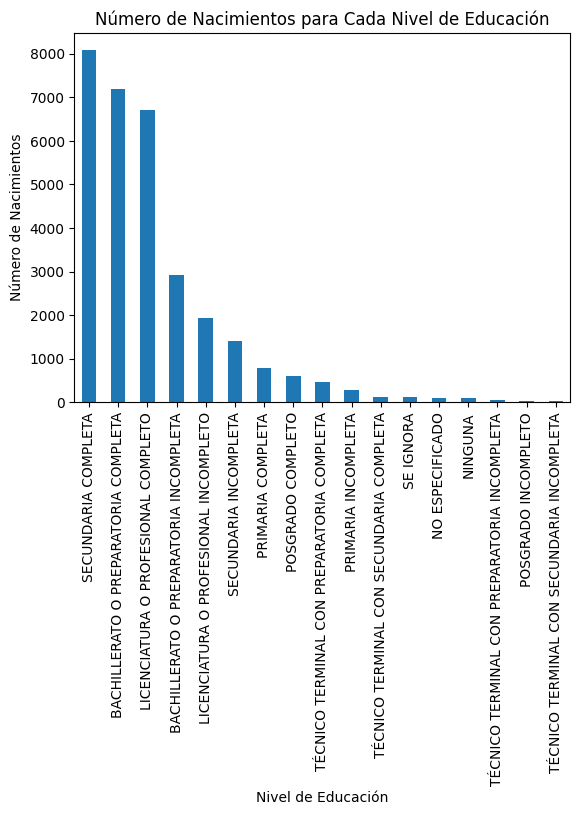

In [99]:
df_filtrado['ESCOLARIDAD'].value_counts().plot(kind='bar')
plt.title('Número de Nacimientos para Cada Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Número de Nacimientos')
plt.show()

Boxplot de la edad de las madres agrupadas por nivel de educación

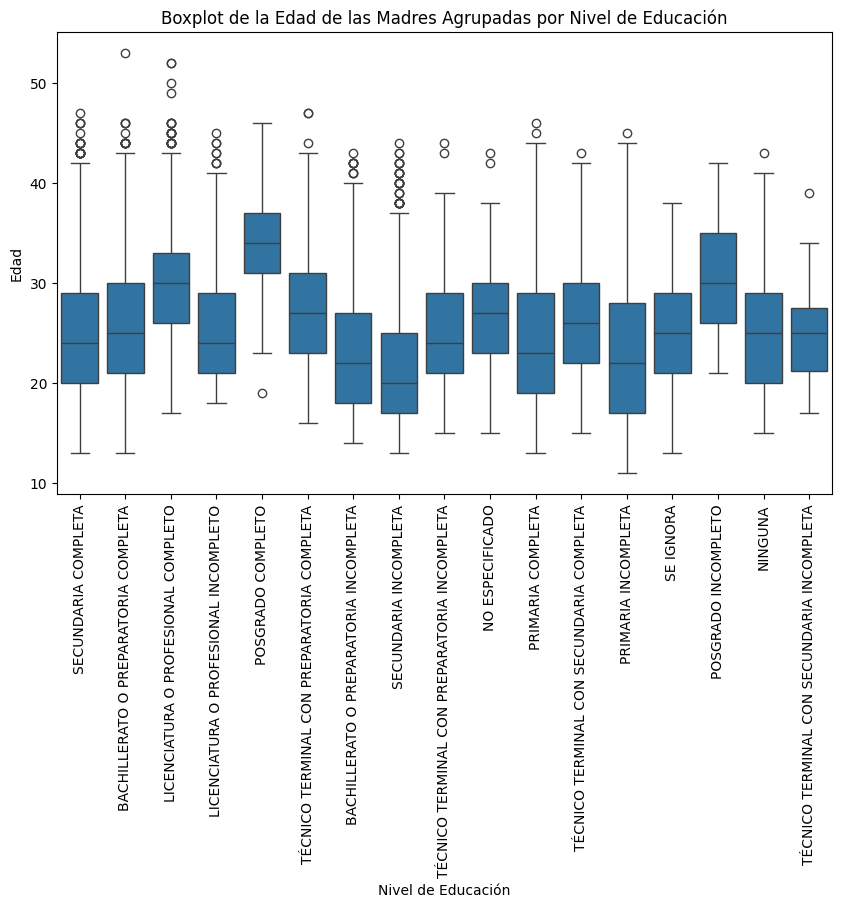

In [106]:
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.boxplot(x='ESCOLARIDAD', y='EDAD', data=df_filtrado)
plt.title('Boxplot de la Edad de las Madres Agrupadas por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Edad')
plt.xticks(rotation=90)
plt.show()

Número de nacimientos por edad y estado civil




Text(0, 0.5, 'Número de nacimientos')

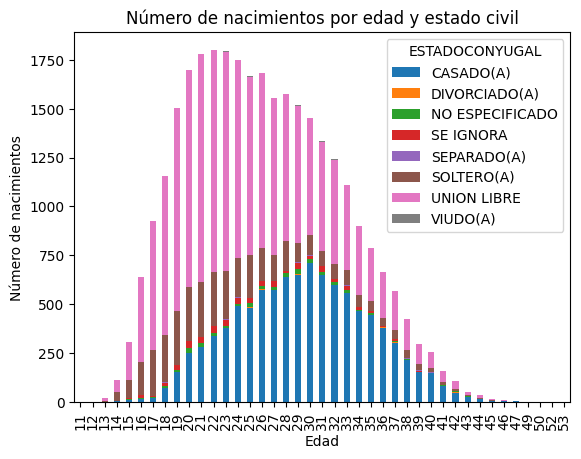

In [126]:
df_filtrado.groupby(['EDAD', 'ESTADOCONYUGAL']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Número de nacimientos por cesarea y estado civil')
plt.xlabel('Edad')
plt.ylabel('Número de nacimientos')

Número de nacimientos por género

Text(0, 0.5, 'Número de nacimientos')

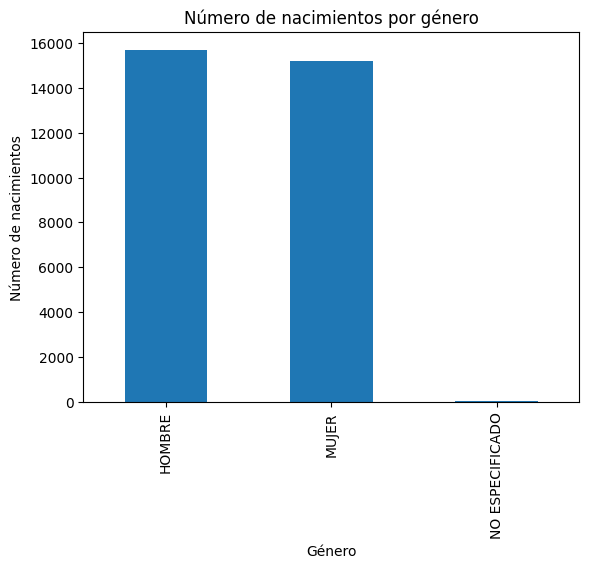

In [127]:
df_filtrado['SEXO'].value_counts().plot(kind='bar')
plt.title('Número de nacimientos por género')
plt.xlabel('Género')
plt.ylabel('Número de nacimientos')

# **REFLEXIÓN**

En el documento se esta analizando una base de datos de los nacimientos que hay en México, la cual se filtro al estado de Sonora en el año 2023. Se renombrarón valores de variables cualitativas para hacer un mejor análisis.
Por otro lado, se hizo una grafica de dsitribución donde se puede notar que la edad más común para el parto parece estar entre los 20 y 25 años. Esto podría indicar que la mayoría de las mujeres en Sonora tienen hijos muy jovenes, se observa que a medida que la edad de las madres aumenta más allá de los 25 años, la cantidad de nacimientos disminuye gradualmente; el pico alrededor de los 20-25 años podría indicar una tendencia cultural o socioeconómica en Sonora. Podría ser interesante investigar más a fondo qué factores contribuyen a esta tendencia. También pude notar que el número de nacimientos es más alto entre las personas con un nivel de educación más bajo, disminuyendo a medida que aumenta el nivel de educación. Esto podría indicar una correlación entre el nivel de educación y la tasa de natalidad. En cuanto al estado civil, la mayoría de los nacimientos ocurren entre las madres casadas. Por último, el número de nacimientos es similar para ambos géneros, hombres y mujeres.

En base al analisis básico con pandas, la edad promedio de más embarazos en el estado de Sonora es de 26 años, con un aproximado de 2 hijos por mujer.

Estos datos son muy interesantes ya que pueden abrir camino a nuevas investigaciones, por las tendencias que se llegaran a dar en el análisis.